# Clustering


Figure showing examples of pairs of datasets and clustering algorithms, on 2D datasets, except the last dataset. The parameters for each of these pairs were tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

![title](sphx_glr_plot_cluster_comparison_001.png)

# Clustering Leaf images

Using Keras Pre-trained Models for Feature Extraction in Image Clustering


### import libraries

In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import os, shutil, glob, os.path
import cv2 as cv

### Import the pre-trained model

In [2]:
# import the VGG16 model : 
  
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Data preparation and train the model of clustering

program iterating a set of images and collecting their features into a list, then applying kMeans in Scikit-Learn to cluster the features.

In [3]:

# Variables
imdir = 'images/'
number_clusters = 99

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
#filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())


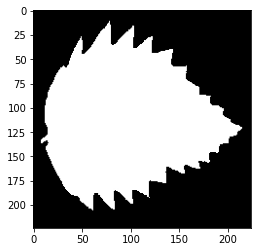

In [33]:
plt.imshow(img)

## Clustering

### Method 1 "AgglomerativeClustering"

In [5]:
clustering = AgglomerativeClustering(n_clusters=number_clusters, affinity='euclidean').fit(featurelist)


# Copy images renamed by cluster 
targetdir = 'out/'
# Check if target dir exists

try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(clustering.labels_):
    print("    Copy: %s / %s" %(i, len(clustering.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")

### Method 2 "KMeans"

In [23]:
# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))


# Copy images renamed by cluster 
targetdir = "outdir/"
# Check if target dir exists
try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")

## Results


Display the first 9 images that have been clustered in class 0

outdir/0_1037.jpg
outdir/0_1065.jpg
outdir/0_113.jpg
outdir/0_1216.jpg
outdir/0_1228.jpg
outdir/0_1322.jpg
outdir/0_1340.jpg
outdir/0_1382.jpg
outdir/0_1434.jpg


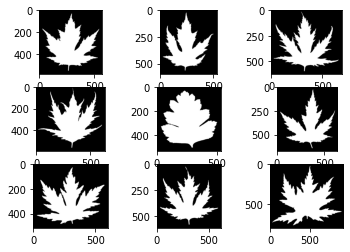

In [25]:
directory='outdir/'
plt.figure()
for i, file in enumerate(os.listdir(directory)[0:9]):
    fullpath = 'outdir/' + file
    print(fullpath)
    img = cv.imread(fullpath)
    plt.subplot(3, 3, i+1)
    #fig, axs = plt.subplots(ncols=5)
    plt.imshow(img)
plt.show()

## Metrics

### Silhouette_score

Internal Cluster Validation: investigating the structure of clustering results without information outside of the dataset, i.e., without the known labels. We will use Silhouette Coeffecient in Scikit-Learn for internal cluster validation. The measure is bounded between -1 for incorrect clustering and 1 for highly dense clustering. Scores around zero indicate overlapping clusters.

for Method : AgglomerativeClustering

In [27]:
labels_AgglomerativeClustering  = clustering.labels_
metrics.silhouette_score(featurelist, labels_AgglomerativeClustering, metric='euclidean')

0.11852571

for Method : kmeans

In [28]:
labels_kmeans  = kmeans.labels_
metrics.silhouette_score(featurelist, labels_kmeans, metric='euclidean')

0.1108474